In [111]:
import sys
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.datasets import load_digits
import matplotlib
import matplotlib.pyplot as plt


In [112]:
class LibraryKPCA(object):
    def __init__(self, n_components):
        self.n_components = n_components

    def kernel_pca(self, X):
        kpca = KernelPCA(n_components=2, kernel='linear')
        X_tf = kpca.fit_transform(X)

        return X_tf


In [113]:
class HandmadeKPCA(object):
    def __init__(self, n_components=2):
        self.n_components = n_components

    def kernel_pca(self, X, y, gamma=0.3):

        # calcaulte euclidean distance matrix
        # 유클리디언 거리 행렬 계산
        dist_matrix = self._find_distance_matrix(X)

        # find variance of one dimensional distance list
        # 일차원 거리 목록의 분산 찾기
        variance = np.var(self._inverse_squareform(dist_matrix))

        # calculate kernel (using rbf kernel)
        # 커널 계산
        gamma = 1 / (2 * variance)
        kernel = self._rbfkernel(gamma, dist_matrix)

        # centering kernel matrix
        # 커널 행렬 중앙화
        mean = np.mean(kernel, axis=0)
        kernel_center = kernel - mean

        # find eigen vector & eigen value
        # 고유 벡터 & 고유 값 찾기
        eigen_vals, eigen_vecs = np.linalg.eig(kernel_center)
        normalize_root = np.sqrt(eigen_vals)
        eigen_vecs = eigen_vecs / normalize_root
        idxs = eigen_vals.argsort()[::-1]
        direction_vecs = eigen_vecs[:, idxs[0: len(X)]]
        X_projected = np.dot(kernel, direction_vecs)

        return X_projected


    def _find_distance_matrix(self, data):
        euclid_dist = []
        for i in data:
            dist = []
            for j in data:
                dist.append(np.linalg.norm(i - j) * np.linalg.norm(i - j))
            dist = np.array(dist)
            euclid_dist.append(dist)
        euclid_dist = np.array(euclid_dist)
        return euclid_dist


    def _inverse_squareform(self, matrix):
        ivs_sqform = []
        for i in range(len(matrix)):
            for j in range(i+1, len(matrix[i])):
                ivs_sqform.append(matrix[i][j])
        ivs_sqform = np.array(ivs_sqform)
        return ivs_sqform


    def _rbfkernel(self, gamma, distance):
        return np.exp(-gamma * distance)


In [114]:
def plot(X, y, cmap, prefix):
    figure = plt.figure()
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(cmap))
    handles, labels = scatter.legend_elements()
    plt.legend(handles, np.unique(y))
    plt.title(f'{prefix} Kernel PCA')
    plt.savefig('exclude/'+prefix+' Kernel PCA')
    figure.show()


In [115]:
def main():
    X, y = load_digits(return_X_y=True)
    ind = np.arange(len(X))
    np.random.shuffle(ind)
    X, y = X[ind], y[ind]

    cmap = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'gray', 'violet', 'lightblue']

    L = LibraryKPCA(2)
    X_tf = L.kernel_pca(X)
    plot(X_tf, y, cmap, "Library")

    M = HandmadeKPCA(2)
    X_projected = M.kernel_pca(X, y, gamma=0.3)
    plot(X_projected, y, cmap, "Handmade")


C:\Users\Roytravel\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\Users\Roytravel\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


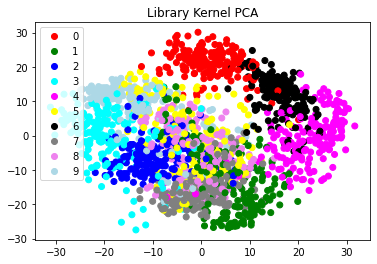

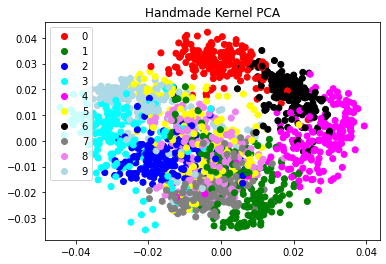

In [116]:
if __name__ == "__main__":
    main()

